---
# Initial Import

In [6]:
from scipy import stats
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import h5netcdf
import datetime
import numpy as np
import glob
import matplotlib.animation as animation
from datetime import datetime,timedelta
import plotly.express as px
import plotly.graph_objects as go
import os
import pickle
import matplotlib
import matplotlib.patches as patches
import multiprocessing
from multiprocessing import Pool
import dask.array as da
import itertools
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.signal import welch
import pandas as pd
import numpy as np
import pickle
from collections import defaultdict
from datetime import datetime
import os

import numpy as np
import xarray as xr
import pandas as pd
import glob, os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspecX
import matplotlib.patches as mpatches
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes as crs_geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import shapely.geometry as sgeom
import copy
import seaborn as sns
from sklearn.neighbors import KernelDensity
import pickle
from datetime import datetime, timedelta
import copy

---

---
# Select Season

In [7]:
m_list = ['MAM','JJA','SON','DJF']
s_list = m_list[0]
s_dict = {'MAM':[3,4,5],'JJA':[6,7,8],'SON':[9,10,11],'DJF':[1,2,12]}
sd_dict = {'MAM':92,'JJA':92,'SON':91,'DJF':90}

---

# Date List

In [8]:
# Define the start and end years
start_year = 2004
end_year = 2017

# Create an empty list to store the dates
dates_list = []

# Iterate through the years
for year in range(start_year, end_year + 1):
    # Define the range of months to be considered: June, July, and August
    for month in s_dict[s_list]:  # June (6), July (7), August (8)
        # Create a date range for the current month of the current year, correctly handling days
        month_dates = pd.date_range(start=f"{year}-{month:02d}-01", 
                                    end=f"{year}-{month:02d}-{pd.Timestamp(f'{year}-{month:02d}').days_in_month}", 
                                    freq='D')
        # Append the dates to the list
        dates_list.extend(month_dates)

date_list = pd.to_datetime(dates_list)

# Print the total number of dates in the list and the first few dates
print(f"Total dates: {len(dates_list)}")
  # Display first 10 dates to check

Total dates: 1288


---

---
# Load NBAMi and Create Subsets

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 5110
Feb 29 present: False
First few dates: DatetimeIndex(['2004-01-01', '2004-01-02', '2004-01-03', '2004-01-04',
               '2004-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-03-01', '2004-03-02'], dtype='datetime64[ns]', freq=None)
BI shape: (5110,)
BI JJA shape: (1288,)
BAM_event_all shape: 1000
3
2009-03-02 00:00:00
5
2010-05-02 00:00:00
4
2012-04-26 00:00:00
3
2017-03-07 00:00:00
4
2016-04-03 00:00:00
3
2012-03-20 00:00:00
5
2017-05-07 00:00:00
4
2004-04-29 00:00:00
4
2006-04-11 00:00:00
3
2016-03-09 00:00:00
3
2010-03-17 00:00:00
3
2004-03-02 00:00:00
5
2015-05-12 00:00:00
3
2007-03-19 00:00:00
3
2013-03-15 00:00:00
5
2010-05-25 00:00:00
3
2015-03-13 00:00:00
4
2008-04-26 00:00:00
4
2004-04-01 00:00:00
5
2014-05-13 00:00:00
5
2008-05-22 00:00:00
5
2006-05-16 00:00:00
4
2015-04-15 00:00:00
4
2009-04-27 00:00:00
5
2012-05-12 00:00:00
4
2014-04

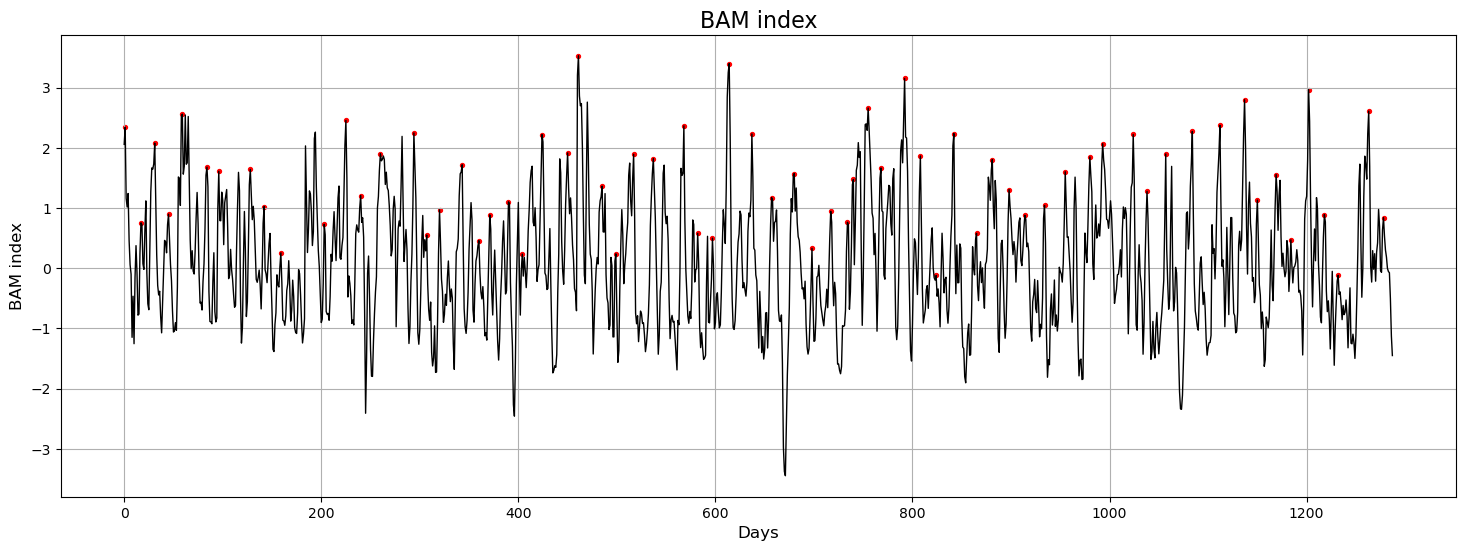

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


95 percentile is 2.909147628081814
80 percentile is 2.244008121368525
70 percentile is 1.9152670853589615
60 percentile is 1.8092293915659767
50 percentile is 1.5889187412689258
Minimum BAM index is -0.11969726753827381
8
7
13
0
18
10
13
17
14
10
8
9
1
2
0
13
0
1
12
11
0
[ 461  614  792 1202 1137  755 1263   59  225 1112  568    1 1084  294
  842  637 1024  424   31  993  450  260 1057  517  808  980  537  881
  343   84  768  128   96  955  680 1169  740  485  898 1038  240  657
 1150  390  934  142  320  717   45 1218  371  914 1278  734   17  203
  582  865  307  597 1184  360  698  159  499  404 1232  824]


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


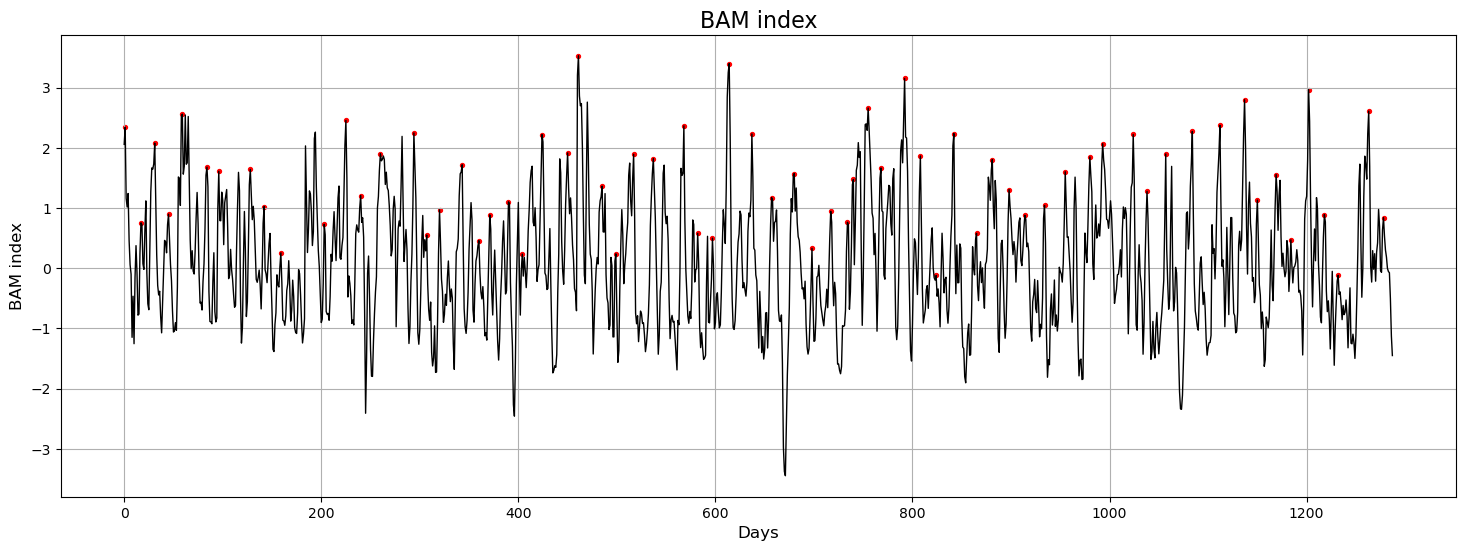

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


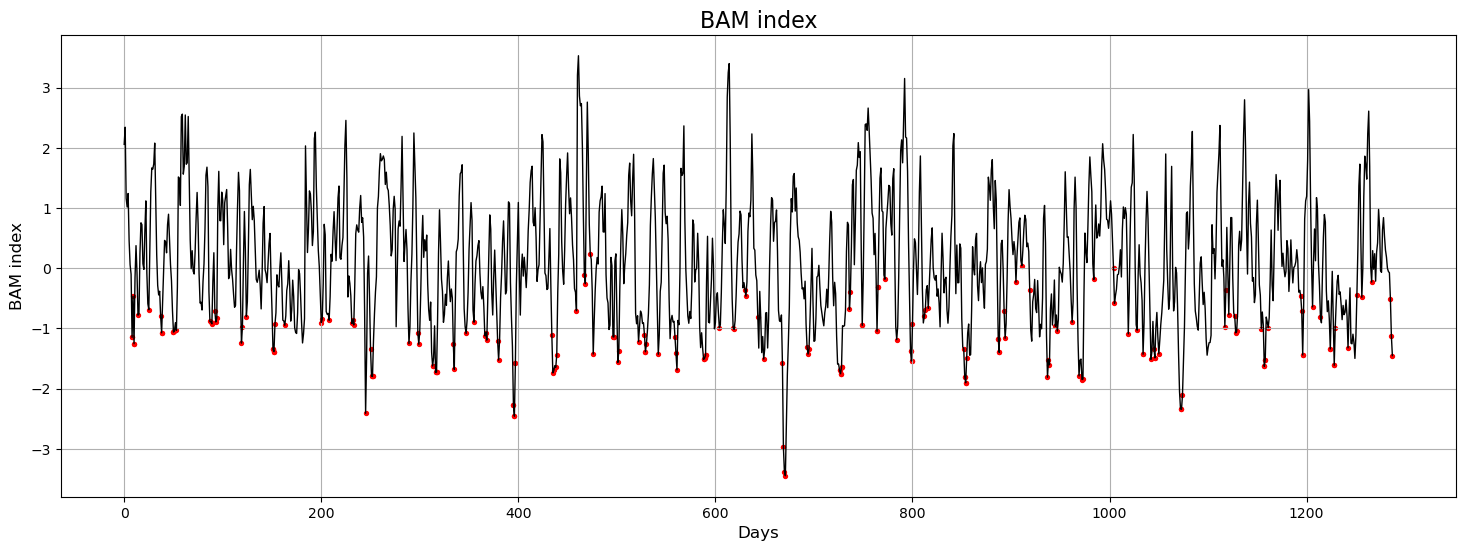

In [35]:
# LOAD NBAMi ALL DAYS
with open('/scratch/negishi/zholder/NBAM_all.pkl','rb') as p:
    NBAMi = pickle.load(p)

# Create a list to hold the values for the years 2003 to 2010
filtered_values = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    if 2004 <= date.year <= 2017:
        if s_dict[s_list][0] <= date.month <= s_dict[s_list][-1]:
            filtered_values.append(value)
st_filtered_values = [((i - np.mean(filtered_values))/np.std(filtered_values)) for i in filtered_values] 

bam_array = []

# Loop through each key-value pair in the dictionary
for date_str, value in NBAMi.items():
    # Convert the string date to a datetime object
    date = datetime.strptime(str(date_str), '%Y-%m-%d')
    
    # Check if the year is between 2003 and 2010 (inclusive)
    if 2004 <= date.year <= 2017:
        if 1 <= date.month <= 12:
            bam_array.append(value)

# Time management
start_date = "2004-01-01"
end_date = "2017-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

jja_index = np.where(dates.month.isin(s_dict[s_list]))[0]
Date_JJA = dates[jja_index]

print('Total JJA days: '+str(len(Date_JJA))) 
print('Date_JJA[0:2]: '+str(Date_JJA[0:2]))

# BAM index
BI = np.array([i for i in bam_array])
BI_JJA = BI[jja_index]

print('BI shape: '+str(BI.shape))
print('BI JJA shape: '+str(BI_JJA.shape))

n_season = 14                        ### no. of season
season_day= sd_dict[s_list]                      ### no. of days in one season
season_all = n_season*season_day     ### no. of days in all seasons

BI_copy = copy.copy(BI)
BAM_event_all = []      # BAM peaks  
BAM_event_BI_all = []   # The value of the BI at that peaking date
number = 0
while 1:
    # index = np.squeeze(np.array(np.where( BI_copy==np.nanmax(BI_copy) )))[0]
    index = np.nanargmax(BI_copy)
#    index: An integer representing the position of the maximum value in BI_copy at each iteration.
    if BI[index]>=BI[index+1] and BI[index]>=BI[index-1] and BI[index]>=BI[index+2] and BI[index]>=BI[index-2]:   # 5 consecutive days        
        BAM_event_all.append(index)
        BAM_event_BI_all.append(BI[index])
        number+=1
        BI_copy[index-12:index+13] = np.nan
        if number > 999:     #  1000 peaks selected 
            break
    else:
        BI_copy[index]=np.nan
        
print('BAM_event_all shape: '+str(len(BAM_event_all)))

# extract BAM event in JJA
BAM_event_JJA = []
BAM_event_date_JJA = [] 
for i in range(len(BAM_event_all)):
    if Month[BAM_event_all[i]] in s_dict[s_list]:
        BAM_event_JJA.append(BAM_event_all[i])
        BAM_event_date_JJA.append(dates[BAM_event_all[i]])
        print(Month[BAM_event_all[i]])
        print(dates[BAM_event_all[i]])

# index in the Date_JJA time series ###
BAM_event = []
BAM_event_BI = []
for i in np.arange(len(BAM_event_JJA)):
    t = np.where(np.array(Date_JJA) == BAM_event_date_JJA[i])[0][0]
    BAM_event.append(t)
    BAM_event_BI.append(BI_JJA[t])   # .append(BAM_event_JJA[i])
    print('check '+ str(BI_JJA[t]) +', '+str(BAM_event_JJA[i]) )

print('BAM_event_JJA size: '+str(len(BAM_event_JJA)))
print('BAM_event size: '+str(len(BAM_event)))

# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(BAM_event, BI_JJA[BAM_event], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

BAM_event = list(BAM_event)
BAM_event_BI = list(BAM_event_BI)

print('95 percentile is '+str(np.percentile(BAM_event_BI,95)))
print('80 percentile is '+str(np.percentile(BAM_event_BI,80)))
print('70 percentile is '+str(np.percentile(BAM_event_BI,70)))
print('60 percentile is '+str(np.percentile(BAM_event_BI,60)))
print('50 percentile is '+str(np.percentile(BAM_event_BI,50)))
print('Minimum BAM index is '+str(np.min(BAM_event_BI)))

# High and low BAM state
T=1
n_BAM = len(BAM_event_JJA)
HBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of high BAM state
LBAM = np.zeros((n_BAM,2*T+1))  # to store the date index of low BAM state

for i in np.arange(n_BAM):
    #HBAM[i,:] = np.arange(BAM_event_JJA[i]-T,BAM_event_JJA[i]+T+1) # index in the entire duration
    HBAM[i,:] = np.arange(BAM_event[i]-T,BAM_event[i]+T+1)  # index in the JJA time series

for i in np.arange(n_BAM):
    index = BAM_event[i]
    if index%season_day-12<0:        
        BI_event = copy.copy(BI_JJA[index-(index%season_day):index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            print(index1)
            LBAM[i,d] = index-(index%season_day)+index1
            BI_event[index1] = np.nan
    elif index%season_day+12>season_day:
        BI_event = copy.copy(BI_JJA[index-12: index+(season_day-(index%season_day))])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan
    else:
        BI_event = copy.copy(BI_JJA[index-12:index+13])
        for d in np.arange(2*T+1):
            index1 =  np.squeeze(np.array(np.where( BI_event==np.nanmin(BI_event) ))[0])
            LBAM[i,d] = index-12+index1
            BI_event[index1] = np.nan

# np.savetxt('../../output/JJA/high_BAM_state_date_index_in_JJA.dat', HBAM, fmt='%f', delimiter=' ')
# np.savetxt('../../output/JJA/low_BAM_state_date_index_in_JJA.dat', LBAM, fmt='%f', delimiter=' ')

HI = HBAM[:,1].astype(int)
LI = LBAM.reshape(-1)
LI = LI.astype(int)
print(HI)
# plot to check whether we get the correct BAM peaking date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(HI, BI_JJA[HI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
ax.grid()
plt.show()
N = 300
# plot to check whether we get the correct BAM minimum date
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,1,1)
plt.plot(np.arange(season_all), BI_JJA[:], '-k', linewidth=1)
plt.scatter(LI, BI_JJA[LI], marker="o", s=8, color="red")
plt.title("BAM index", pad=5, fontdict={'family':'Times New Roman', 'size':16})
plt.xlabel('Days',fontsize=12)
plt.ylabel('BAM index',fontsize=12)
# plt.xlim(0,300)
#plt.xticks([0,29,59,89])
#ax.set_xticklabels([1,30,60,90])
ax.grid()
plt.show()

LI.sort()
HI.sort()



# Extract Season

In [10]:
import numpy as np

# Assuming HI is a list or NumPy array of values
# Create a list of 17 empty lists, one for each season
HH = [[] for _ in range(14)]

# Define number of seasons and season length
season_length = sd_dict[s_list]   # or 92 if inclusive
n_seasons = 14

# Assign each value in HI to its correct season
for val in HI:
    season_index = int(val // season_length)
    if season_index >= n_seasons:
        season_index = n_seasons - 1  # Catch edge case where val == max
    HH[season_index].append(val)



import numpy as np

# Assuming HI is a list or NumPy array of values
# Create a list of 17 empty lists, one for each season
LL = [[] for _ in range(14)]

# Define number of seasons and season length
season_length = sd_dict[s_list]   # or 92 if inclusive
n_seasons = 14

# Assign each value in HI to its correct season
for val in LI:
    season_index = int(val // season_length)
    if season_index >= n_seasons:
        season_index = n_seasons - 1  # Catch edge case where val == max
    LL[season_index].append(val)


# Create Positive and Negative Phase Subsets

In [11]:
# Make sure HI is a NumPy array
HI = np.array(HI)
# Initialize list for new indices and values
HI_expanded = []
for h in HI:
    # Collect h-1, h, h+1 if within valid bounds
    for offset in [-1, 0]:
        idx = h + offset
        if 0 <= idx < len(date_list):
            HI_expanded.append(idx)         
# Convert to arrays if needed
HI_expanded = np.array(HI_expanded)


pos_BI_dates = [i for i in date_list[HI]]
neg_BI_dates = [pd.Timestamp(i) for i in np.unique(date_list[LI])]
pm1 = [i - np.timedelta64(1, 'D') for i in pos_BI_dates if i.month in s_dict[s_list]]
pp1 = [i + np.timedelta64(1, 'D') for i in pos_BI_dates if i.month in s_dict[s_list]]

excluded_dates = set(pos_BI_dates + neg_BI_dates)
other = [d for d in date_list if d.month in s_dict[s_list] and d not in excluded_dates]

all_pos = sorted(set(pm1 + pos_BI_dates))
print(f'{len(pos_BI_dates)} Peak days')
print(f'{len(neg_BI_dates)} Low State days')
print(f'{len(pm1)} Peak - 1')
print(f'{len(all_pos)} all_pos Days')
# print(f'{len(pp1)} Peak + 1')
# print(f'{len(other)} Other days')
# print(f'{len(date_list)} Total Days')

68 Peak days
164 Low State days
68 Peak - 1
136 all_pos Days


---

---
# Load EKE and vT

In [12]:
p = '/depot/wanglei/data/ERA5_uvT/u_component_of_wind_1990_1dg.nc'
lll = xr.open_dataset(p)
lats_vt = lll.sel(lat = slice(0,90)).lat.values
lons_vt = lll.sel(lat = slice(0,90)).lon.values
EKEs = np.load('/scratch/negishi/zholder/EKE_unflitered_2000_2020.npy')
vt = np.load('/scratch/negishi/zholder/vt_850_2000_2020.npy')
vt.shape

# Time management
start_date = "2000-01-01"
end_date = "2020-12-31"
dates = pd.date_range(start=start_date, end=end_date, freq='D')
dates = dates[~((dates.month == 2) & (dates.day == 29))]  # Remove Feb 29
Month = dates.month

print(type(dates))
print(f"Total days: {len(dates)}") 
print(f"Feb 29 present: {any((dates.month == 2) & (dates.day == 29))}")  # False
print(f"First few dates: {dates[:5]}")

# Get JJA
# mam_index = np.where(dates.month.isin([3, 4, 5]))[0]
mam_index = np.where(
    dates.month.isin([3, 4, 5]) & dates.year.isin(np.arange(2004, 2018))
)[0]
Date_mam = dates[mam_index]

vt_mam = vt[mam_index]
eke_mam = EKEs[mam_index]
print('Total JJA days: '+str(len(Date_mam))) 
print('Date_JJA[0:2]: '+str(Date_mam[0:2]))


vt_neg = vt_mam[np.unique(LI)]
vt_pos = vt_mam[HI_expanded]

eke_neg = eke_mam[np.unique(LI)]
eke_pos = eke_mam[HI_expanded]

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Total days: 7665
Feb 29 present: False
First few dates: DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05'],
              dtype='datetime64[ns]', freq=None)
Total JJA days: 1288
Date_JJA[0:2]: DatetimeIndex(['2004-03-01', '2004-03-02'], dtype='datetime64[ns]', freq=None)


---

---
# Load ETC

In [13]:
ds = xr.load_dataset('/scratch/negishi/zholder/ETC_TRACKS.nc')

Load ETC-MCS Collocated Tracks for Each Phase 

- Extracted from results df in GRL_NBAM_MCS_FIG3_FIG4

In [23]:
pos_mcs_etc_tracks = [5624, 7453, 7041, 6031, 6264, 6465, 5221, 6264, 5435, 6264, 6453,
       6875, 6033, 7660, 6033, 6651, 6033, 6465, 5860, 5221, 6875, 7689,
       5848, 6875, 6875, 6264, 6858, 5624, 6252, 6264, 6651, 5653, 7660,
       7631, 7660, 5221, 5221, 5614, 5051, 6670, 5230, 5860, 5051, 6866,
       5240, 6027, 6252, 5624, 7066, 5848, 5413]
neg_mcs_etc_tracks = [6659, 5243, 7433, 7431, 7243, 6864, 7455, 5852, 7656, 7433, 6256,
       6462, 5035, 6462, 6224, 5854, 7433, 6875, 6452, 5035, 5432, 6243,
       6256, 7479, 6242, 6242, 5629, 6875, 6249, 5855, 6243, 5243, 5852,
       5055, 7458, 6013, 6461, 5855, 6243, 7046, 7455, 6461, 5055, 7455,
       7053, 7430, 7458, 7071, 5864, 6462, 5852]

me_track_pos = ds.sel(track = ds.track.isin(pos_mcs_etc_tracks))
me_track_neg = ds.sel(track = ds.track.isin(neg_mcs_etc_tracks))

---
# Load Precipitation Data

In [14]:
ll = xr.open_dataset('/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/JJAs/20040101.0000_20050101.0000/mcstrack_20040601_000000.nc')
lats = ll.lat.values
lons = ll.lon.values

load all precip
- Precip files made from extracting daily precipitation rate from US MCS Dataset

In [15]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_MAM/'

# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_MAM_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)

    file_path_total = os.path.join(data_dir, f"{year}_MAM.npy")
    arr_total = np.load(file_path_total)
    arrays_total.append(arr_total)

# Stack (concatenate) the arrays along the first axis (day axis)
mcs_array = np.concatenate(arrays_mcs, axis=0)
total_array = np.concatenate(arrays_total, axis=0)
# Optionally, save the concatenated array to a new file
# np.save(os.path.join(data_dir, '2004_2020_JJA_concatenated.npy'), concatenated_array)

print(f"Shape of concatenated mcs array: {mcs_array.shape}")
print(f"Shape of concatenated total array: {total_array.shape}")

Shape of concatenated mcs array: (1288, 715, 1100)
Shape of concatenated total array: (1288, 715, 1100)


load etc-mcs precip

In [ ]:
import numpy as np
import os

# Path to the directory containing the .npy files
data_dir = '/scratch/negishi/zholder/MCS_NEX_v3/pixel_files/JJA_files/Daily_sum_ETC/'

# Initialize an empty list to store arrays
arrays_mcs = []
arrays_total = []
# Loop over the years 2004 to 2020 and load each .npy file
for year in range(2004, 2018):
    file_path_mcs = os.path.join(data_dir, f"{year}_ETC_MCSONLY.npy")
    arr_mcs = np.load(file_path_mcs)
    arrays_mcs.append(arr_mcs)



# Stack (concatenate) the arrays along the first axis (day axis)
etc_array = np.concatenate(arrays_mcs, axis=0)
# Optionally, save the concatenated array to a new file
# np.save(os.path.join(data_dir, '2004_2020_JJA_concatenated.npy'), concatenated_array)

print(f"Shape of concatenated mcs array: {etc_array.shape}")


Shape of concatenated mcs array: (1288, 715, 1100)


calculate extreme precipitation

In [17]:
pos_rain_mcs = mcs_array[HI_expanded] 
neg_rain_mcs = mcs_array[np.unique(LI)] 

pos_rain_total = total_array[HI_expanded] 
neg_rain_total = total_array[np.unique(LI)]

threshold = np.percentile(total_array, 99, axis=0)
threshold_mcs = np.percentile(mcs_array, 99, axis=0)

# Create boolean masks of extreme events

extreme_pos = pos_rain_total > threshold  # shape: (days_pos, lat, lon)
extreme_neg = neg_rain_total > threshold  # shape: (days_neg, lat, lon)

extreme_pos_mcs = pos_rain_mcs > threshold  # shape: (days_pos, lat, lon)
extreme_neg_mcs = neg_rain_mcs > threshold  # shape: (days_neg, lat, lon)


# Count the number of extreme days at each grid point

extreme_count_pos = np.sum(extreme_pos, axis=0)  # shape: (lat, lon)
extreme_count_neg = np.sum(extreme_neg, axis=0)  # shape: (lat, lon)


extreme_count_pos_mcs = np.sum(extreme_pos_mcs, axis=0)  # shape: (lat, lon)
extreme_count_neg_mcs = np.sum(extreme_neg_mcs, axis=0)  # shape: (lat, lon)

# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point

# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))


# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos = (extreme_count_pos / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg = (extreme_count_neg / n_neg) * 100 # shape: (lat, lon)

freq_extreme_pos_mcs = (extreme_count_pos_mcs / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_mcs = (extreme_count_neg_mcs / n_neg) * 100 # shape: (lat, lon)

# Now compare the frequencies
freq_diff = freq_extreme_pos - freq_extreme_neg  # shape: (lat, lon)
freq_diff_mcs = freq_extreme_pos_mcs - freq_extreme_neg_mcs  # shape: (lat, lon)

##########

pos_rain_etc = etc_array[HI_expanded] 
neg_rain_etc = etc_array[np.unique(LI)] 

pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100

# Create boolean masks of extreme events

extreme_pos_etc = pos_rain_etc > threshold  # shape: (days_pos, lat, lon)
extreme_neg_etc = neg_rain_etc > threshold  # shape: (days_neg, lat, lon)


# Count the number of extreme days at each grid point

extreme_count_pos_etc = np.sum(extreme_pos_etc, axis=0)  # shape: (lat, lon)
extreme_count_neg_etc = np.sum(extreme_neg_etc, axis=0)  # shape: (lat, lon)


# extreme_count_pos and extreme_count_neg are already computed from previous steps
# These are counts of extreme (95th percentile) days per grid point
# Normalize by number of days in each subset

n_pos = len(HI_expanded)
n_neg = len(np.unique(LI))

# Compute frequency (i.e., proportion of extreme days)

freq_extreme_pos_etc = (extreme_count_pos_etc / n_pos) * 100 # shape: (lat, lon)
freq_extreme_neg_etc = (extreme_count_neg_etc / n_neg) * 100 # shape: (lat, lon)


/tmp/ipykernel_3109879/4105352590.py:54: RuntimeWarning: invalid value encountered in divide
  pos_etc_con = (np.sum(pos_rain_etc,axis=0) / np.sum(pos_rain_mcs,axis=0)) * 100
/tmp/ipykernel_3109879/4105352590.py:55: RuntimeWarning: invalid value encountered in divide
  neg_etc_con = (np.sum(neg_rain_etc,axis=0) / np.sum(neg_rain_mcs,axis=0)) * 100


calculate ETC-MCS contribution to extreme precipitation

In [18]:

# Step 1: Compute 99th percentile at each grid point
p99 = np.percentile(total_array, 99, axis=0)  # shape: (lat, lon)

# Step 2: Create a mask where total >= 99th percentile (broadcast across time)
mask_99_pos = pos_rain_mcs >= p99  # shape: (days, lat, lon)
mask_99_neg = neg_rain_mcs >= p99


# Step 3: Apply the mask
etc_99_pos = np.where(mask_99_pos, pos_rain_etc, 0)
total_99_pos = np.where(mask_99_pos, pos_rain_mcs, 0)

etc_99_neg = np.where(mask_99_neg, neg_rain_etc, 0)
total_99_neg = np.where(mask_99_neg, neg_rain_mcs, 0)

# Step 4: Sum over time and compute percent contribution
with np.errstate(divide='ignore', invalid='ignore'):
    ee_con_pos = (np.sum(etc_99_pos, axis=0) / np.sum(total_99_pos, axis=0)) * 100
    ee_con_pos = np.nan_to_num(ee_con_pos)  # Replace NaNs from 0/0 with 0

    ee_con_neg = (np.sum(etc_99_neg, axis=0) / np.sum(total_99_neg, axis=0)) * 100
    ee_con_neg = np.nan_to_num(ee_con_neg)  # Replace NaNs from 0/0 with 0


check ETC-MCS contribution

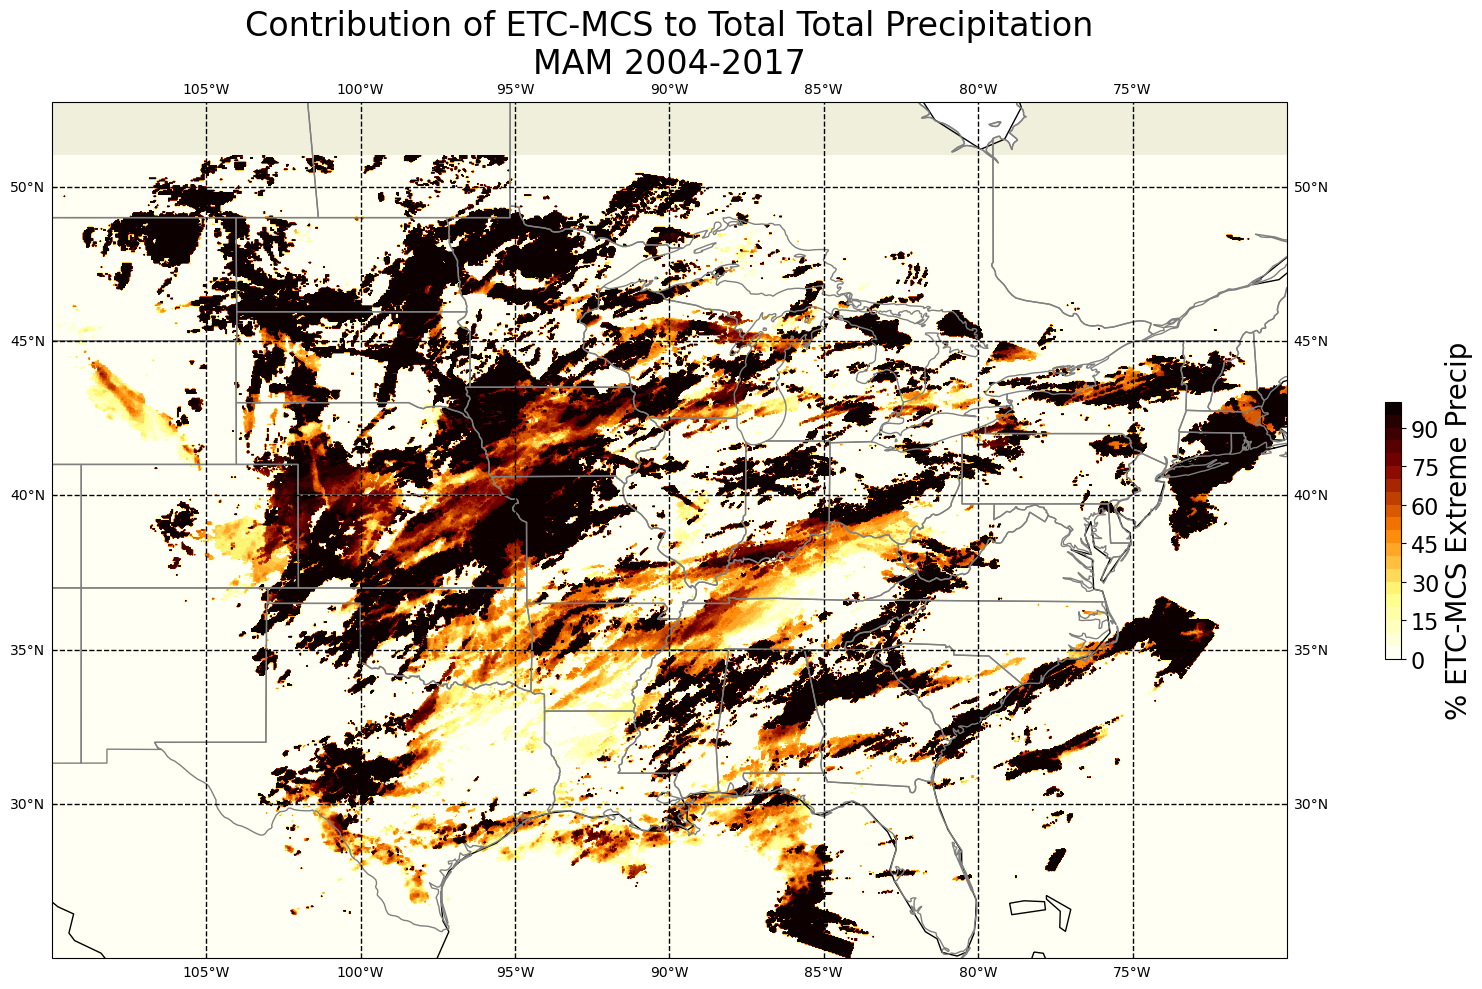

In [ ]:

x, y = np.float32(np.meshgrid(lons, lats))

# Set up the figure and subplots
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the contour levels for both positive and negative rain
clevs = np.arange(0, 105, 5)

# Set the extent for both axes (same for both)
for ax in [ax1]:
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlines = True

# Plot the first subplot (positive rainfall)
mesh1 = ax1.contourf(x, y, ee_con_pos, levels=clevs, cmap='afmhot_r')

cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.3)
cb1.set_label(f'% ETC-MCS Extreme Precip', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title(f'Contribution of ETC-MCS to Total Total Precipitation\nMAM 2004-2017', size=24)

# Show the plot
plt.tight_layout()
plt.show()


---
# PLOT FIGURE 2

RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

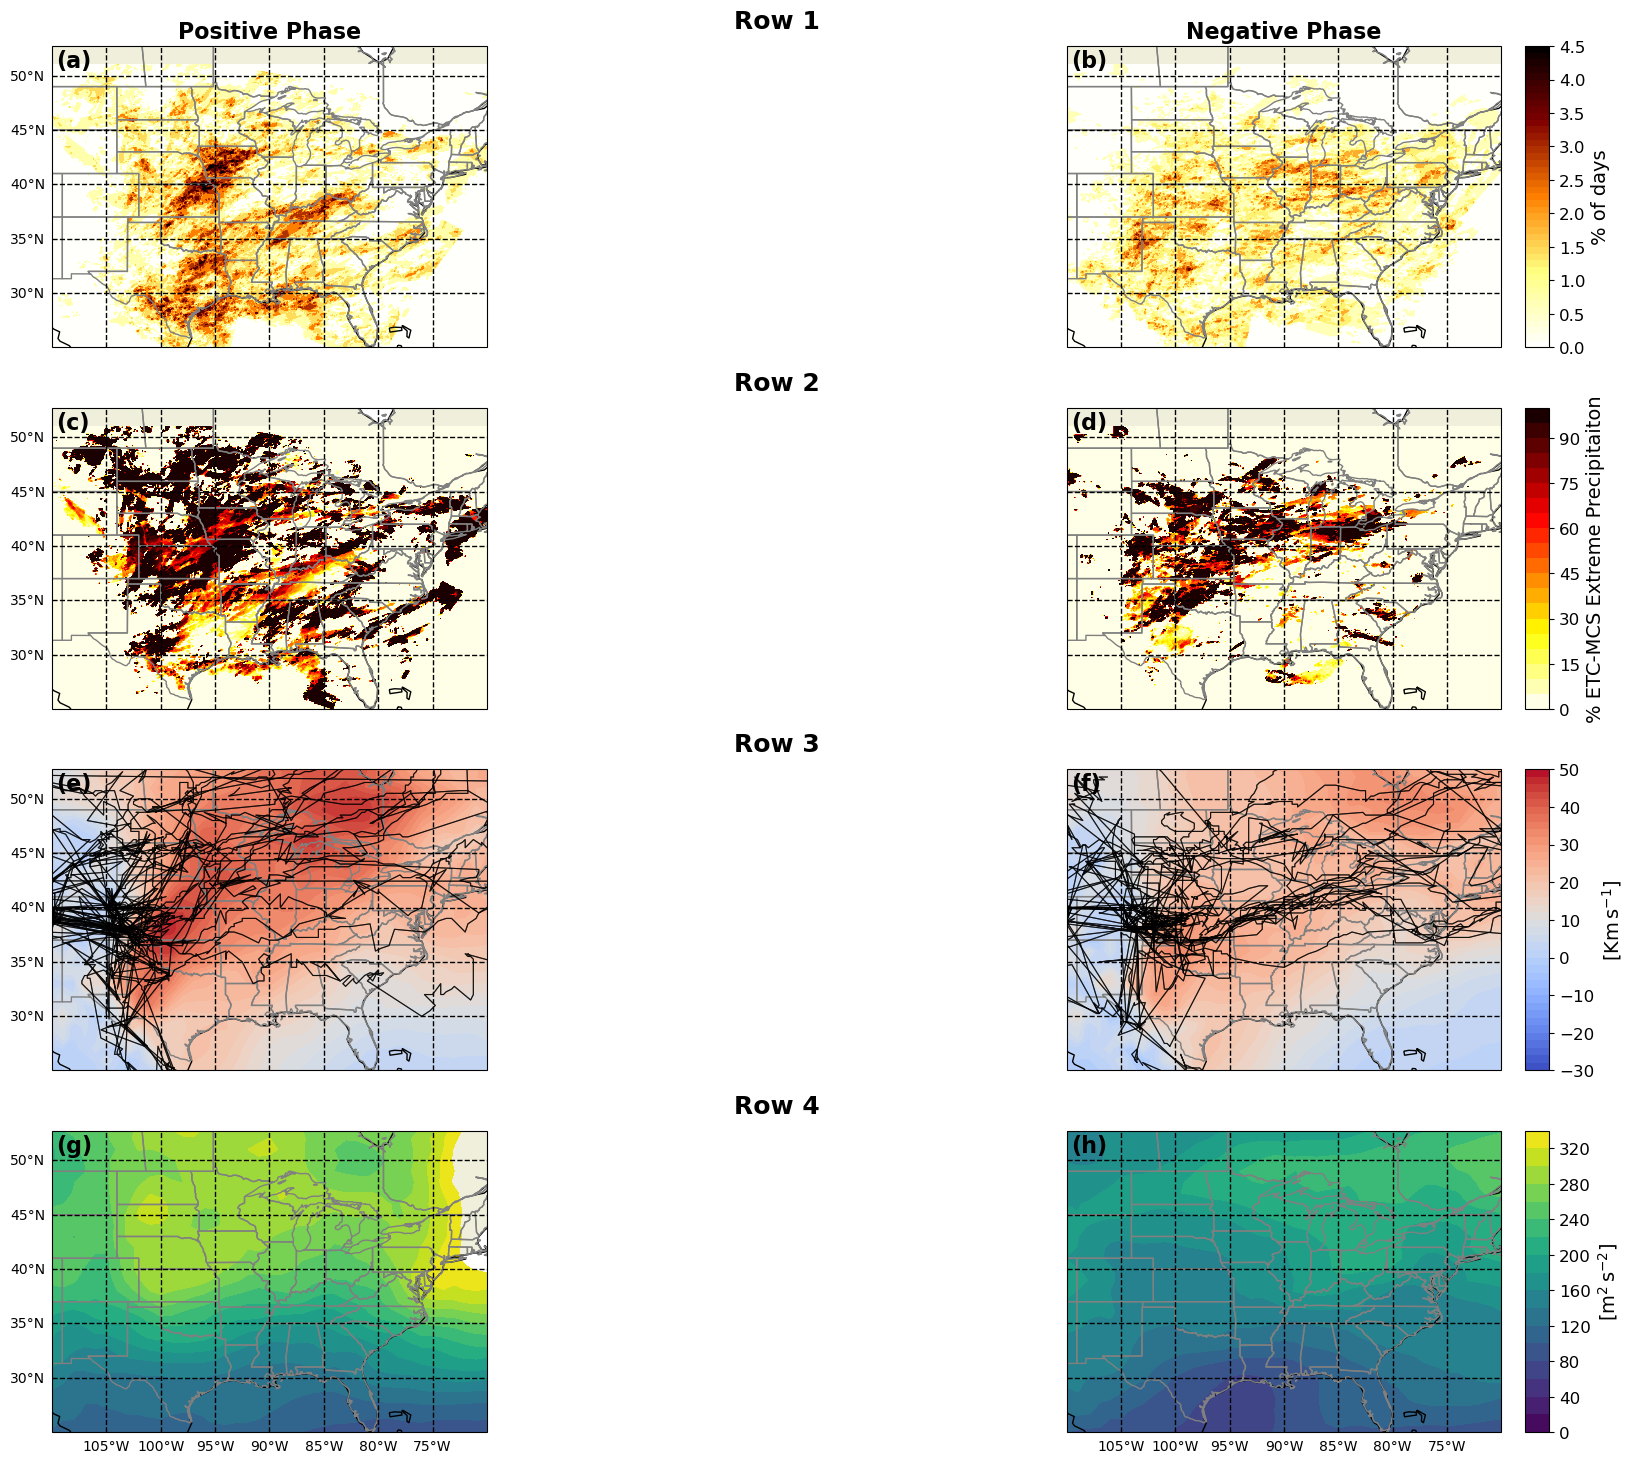

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create mesh grids
x, y = np.meshgrid(lons, lats)
x_v, y_v = np.meshgrid(lons_vt, lats_vt)

# Set up 4x2 subplot figure
fig, axs = plt.subplots(4, 2, figsize=(24, 18), subplot_kw={'projection': ccrs.PlateCarree()}, constrained_layout=True)
axs = axs.flatten()

# Contour levels
clevs_std_pos = np.arange(0, 4.6, 0.1)
# clevs_pos_etc_con = np.arange(0, 12.2, 0.2)
clevs_pos_etc_con = np.arange(0, 105, 5)
clevs_vt = np.arange(-30, 52, 2)
clevs_eke = np.arange(0, 360, 20)

# Plot data (data array, key)
data = [
    (freq_extreme_pos_mcs, 'pos'),
    (freq_extreme_neg_mcs, 'neg'),
    # (freq_extreme_pos_etc, 'pos_etc'),
    # (freq_extreme_neg_etc, 'neg_etc'),
    (ee_con_pos, 'pos_etc'),
    (ee_con_neg, 'neg_etc'),
    (np.nanmean(vt_pos, axis=0), 'vt_pos'),
    (np.nanmean(vt_neg, axis=0), 'vt_neg'),
    (np.nanmean(eke_pos, axis=0), 'eke_pos'),
    (np.nanmean(eke_neg, axis=0), 'eke_neg')
]

# Labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
row_titles = ['Row 1', 'Row 2', 'Row 3', 'Row 4','Row 5']
phase_titles = ['Positive Phase', 'Negative Phase']

# Colorbar handles per row
row_meshes = [None] * 4

# === Plot each subplot ===
for i, (freq, key) in enumerate(data):
    ax = axs[i]
    row_idx, col_idx = divmod(i, 2)

    # Map setup
    ax.set_extent([np.min(lons), np.max(lons), np.min(lats), np.max(lats)])
    ax.coastlines(resolution="110m", linewidth=1)
    ax.add_feature(cfeature.STATES, edgecolor='grey')
    ax.add_feature(cfeature.LAND, edgecolor='grey')

    # Gridlines
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='black', linestyle='--')
    gl.top_labels = False
    gl.right_labels = False
    gl.bottom_labels = (row_idx == 3)
    gl.left_labels = (col_idx == 0)

    # Choose contour and colormap
    if key in ['pos_etc', 'neg_etc']:
        clevs = clevs_pos_etc_con
        mesh = ax.contourf(x, y, freq, levels=clevs, cmap='hot_r')
    elif key in ['pos', 'neg']:
        clevs = clevs_std_pos
        mesh = ax.contourf(x, y, freq, levels=clevs, cmap='afmhot_r')
    elif key in ['vt_pos', 'vt_neg']:
        clevs = clevs_vt
        mesh = ax.contourf(x_v, y_v, freq, levels=clevs, cmap='coolwarm')
        def plot_all_track_lines(ds_subset, ax, color='black', linewidth=0.8, alpha=0.7):
            """Plot all lat/lon tracks from an xarray.Dataset subset onto a Cartopy axis."""
            for i in range(ds_subset.track.size):
                lat = ds_subset.lat.isel(track=i).values
                lon = ds_subset.lon.isel(track=i).values

                # Mask NaNs
                valid = ~np.isnan(lat) & ~np.isnan(lon)
                if np.sum(valid) > 1:  # Only plot lines with more than 1 point
                    ax.plot(lon[valid], lat[valid], transform=ccrs.PlateCarree(),
                            color=color, linewidth=linewidth, alpha=alpha)


        plot_all_track_lines(me_track_pos, axs[4], color='black', linewidth=0.8, alpha=0.7)
        plot_all_track_lines(me_track_neg, axs[5], color='black', linewidth=0.8, alpha=0.7)
    elif key in ['eke_pos', 'eke_neg']:
        clevs = clevs_eke
        mesh = ax.contourf(x_v, y_v, freq, levels=clevs, cmap='viridis')

    row_meshes[row_idx] = mesh

    # Subplot label
    ax.text(0.01, 0.99, subplot_labels[i], transform=ax.transAxes,
            fontsize=16, fontweight='bold', va='top', ha='left')

    # Column titles (only on top row)
    if row_idx == 0:
        ax.set_title(phase_titles[col_idx], fontsize=16, fontweight='bold')

# === Row titles centered above each row ===
for row in range(4):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    x0 = (left_ax.get_position().x0 + right_ax.get_position().x1) / 2
    y1 = left_ax.get_position().y1 + 0.01
    fig.text(x0, y1, row_titles[row], ha='center', fontsize=18, fontweight='bold')
row_keys = ['pos','pos_etc','vt_pos','eke_pos']  # to store keys for each row

# === Add colorbars aligned with each row ===
for row in range(4):
    left_ax = axs[row * 2]
    right_ax = axs[row * 2 + 1]
    cax_x = right_ax.get_position().x1 + 0.01
    cax_y = left_ax.get_position().y0
    cax_h = left_ax.get_position().y1 - cax_y
    cax = fig.add_axes([cax_x, cax_y, 0.01, cax_h])
    cb = fig.colorbar(row_meshes[row], cax=cax,extend='max')

    # Use the saved key for this row
    key = row_keys[row]

    if key in ['vt_pos', 'vt_neg']:
        cb.set_label(r'[$\mathrm{Km\,s^{-1}}$]', fontsize=14)
    elif key in ['eke_pos', 'eke_neg']:
        cb.set_label(r'[$\mathrm{m^{2}\,s^{-2}}$]', fontsize=14)
    elif key in ['pos_etc', 'neg_etc']:
        cb.set_label(f'% ETC-MCS Extreme Precipitaiton',fontsize=14)
    elif key in ['pos','neg']:
        cb.set_label('% of days', fontsize=14)

    cb.ax.tick_params(labelsize=12)


plt.tight_layout()
plt.show()


---

# Start Figure 1

Plot Panel a)

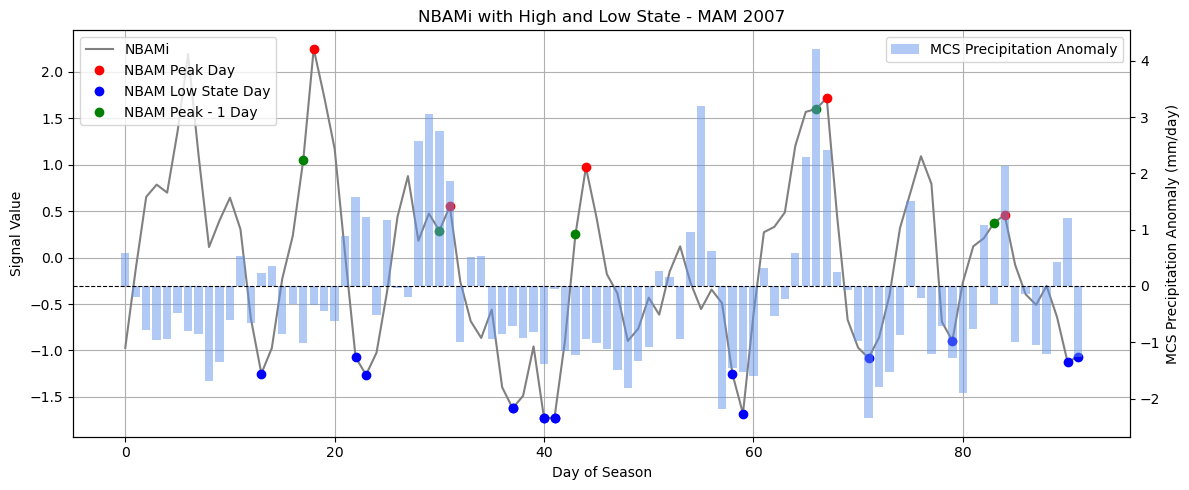

In [28]:
import numpy as np
import matplotlib.pyplot as plt

season_idx = 3
# Define domain bounds
latmin_b, latmax_b = 30, 50
lonmin_b, lonmax_b = -105, -80

# Adjust longitudes if necessary (convert 0-360 to -180 to 180)
if np.any(lons > 180):
    lons = (lons + 180) % 360 - 180

# Get domain indices
lat_mask = (lats >= latmin_b) & (lats <= latmax_b)
lon_mask = (lons >= lonmin_b) & (lons <= lonmax_b)
lat_indices = np.where(lat_mask)[0]
lon_indices = np.where(lon_mask)[0]

# Season start/end indices for 92-day season
season_start = season_idx * days_per_season
season_end = season_start + days_per_season

# Extract season data for filtered_values
data = np.array(filtered_values.copy())
season_data = data[season_start:season_end]

# Positive and negative peak local indices relative to season
pos_local = [i - season_start for i in HH[season_idx]]
neg_local = [i - season_start for i in LL[season_idx]]

# ==== Calculate precipitation anomaly ====

# Extract MAM precip data in domain (all seasons)
mam_precip = mcs_array[:, lat_indices[:, None], lon_indices]  # shape (1288, Nlat, Nlon)

# Domain-averaged daily precip for all MAM days
mam_daily_domain_avg = np.mean(mam_precip, axis=(1, 2))  # (1288,)

# Reshape to (years, days_per_season)
mam_daily_domain_avg_reshaped = mam_daily_domain_avg.reshape((-1, days_per_season))

# Climatology mean for each day of season
mam_clim = np.mean(mam_daily_domain_avg_reshaped, axis=0)

# Current season precip and anomaly
season_precip = mam_daily_domain_avg_reshaped[season_idx]
season_anomaly = season_precip - mam_clim

# ==== Plotting ====

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot main signal
ax1.plot(season_data, label='NBAMi', color='gray')

# Plot positive and negative peaks
ax1.plot(pos_local, season_data[pos_local], 'ro', label='NBAM Peak Day',zorder=3)
ax1.plot(neg_local, season_data[neg_local], 'bo', label='NBAM Low State Day',zorder=3)

# Plot green dots one day before each positive peak (if within range)
green_dot_days = [i - 1 for i in pos_local if i - 1 >= 0]
ax1.plot(green_dot_days, season_data[green_dot_days], 'go', label='NBAM Peak - 1 Day',zorder=3)


# Customize primary axis
ax1.set_xlabel('Day of Season')
ax1.set_ylabel('Signal Value')
ax1.set_title(f'NBAMi with High and Low State - MAM {2004 + season_idx}')
ax1.grid(True)
ax1.legend(loc='upper left')

# Create secondary y-axis for precipitation anomaly bars
ax2 = ax1.twinx()
ax2.bar(np.arange(days_per_season), season_anomaly, color='cornflowerblue', alpha=0.5, label='MCS Precipitation Anomaly')
ax2.axhline(0, color='black', linewidth=0.8, linestyle='--')
ax2.set_ylabel('MCS Precipitation Anomaly (mm/day)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


Choose pos and neg phase date for precip plot

In [29]:
neg_date = date_list[335]
#59

In [30]:
pos_date = date_list[342]
#66

In [37]:
pos_date

Timestamp('2007-05-06 00:00:00')

panel b)

/tmp/ipykernel_3109879/884646224.py:35: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for track_idx in range(ds.dims['track']):


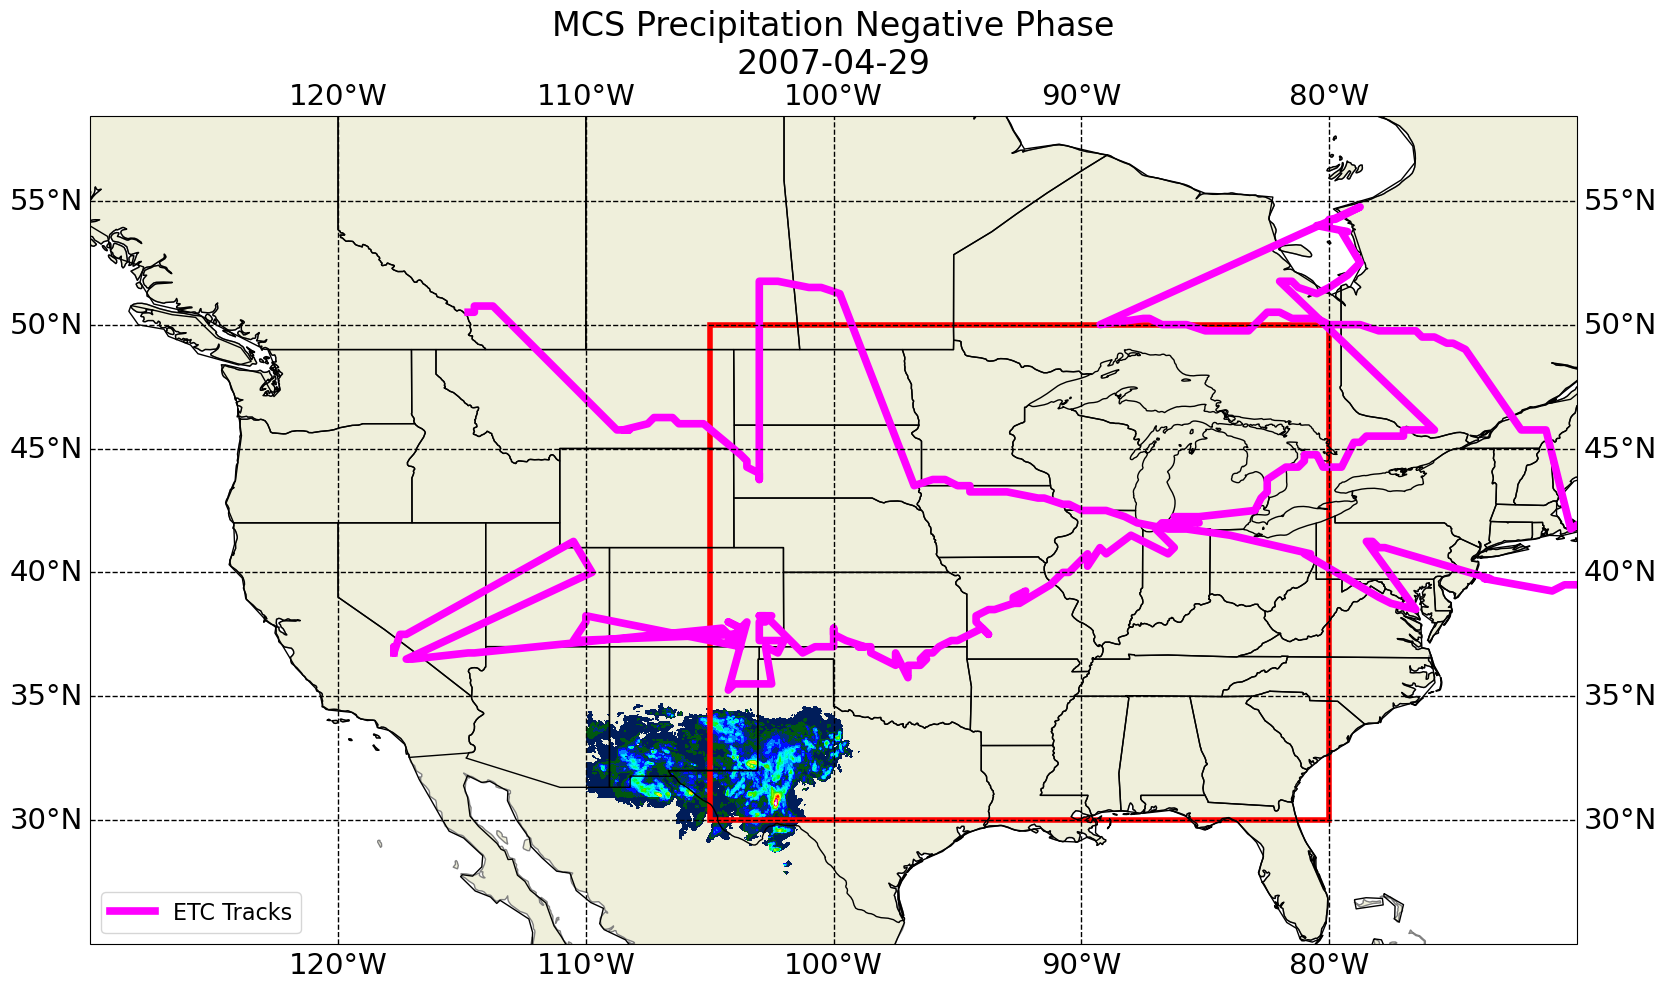

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib import lines as mlines
latmin_b, latmax_b = 30, 50
lonmin_b, lonmax_b = -105, -80

target_day = np.datetime64(neg_date)
# Create meshgrid
x, y = np.float32(np.meshgrid(lons, lats))

# Define the contour levels
clevs = np.arange(0, 165, 5)

# Get a copy of the colormap and customize it
base_cmap = plt.cm.gist_ncar(np.linspace(0, 1, len(clevs)-1))

# Replace the first color (corresponding to 0) with white
base_cmap[0] = [1, 1, 1, 1]  # RGBA for white

# Create new colormap and normalization
custom_cmap = ListedColormap(base_cmap)
norm = BoundaryNorm(clevs, ncolors=custom_cmap.N)

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and map features
ax1.set_extent([-130, lonmax_b+10, 25, 55])
ax1.coastlines(resolution="110m", linewidth=1)
ax1.add_feature(cfeature.STATES, edgecolor='black')
ax1.add_feature(cfeature.LAND, edgecolor='grey')
for track_idx in range(ds.dims['track']):
    time_on_day = ds['time'].isel(track=track_idx).dt.floor('D') == target_day

    # If the track exists at any time on the target day
    if time_on_day.any():
        # Plot the *full* track (remove NaNs)
        lats_e = ds['lat'].isel(track=track_idx).dropna('time_step')
        lons_e = ds['lon'].isel(track=track_idx).dropna('time_step')

        if lats_e.size >= 2:
            ax1.plot(lons_e, lats_e, transform=ccrs.PlateCarree(), color='magenta', linewidth=5.5)
# Gridlines
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
from matplotlib import font_manager

gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Set font size for grid labels
gl.xlabel_style = {'size': 21, 'color': 'black'}
gl.ylabel_style = {'size': 21, 'color': 'black'}

gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True
masked_data = np.ma.masked_equal(mcs_array[335], 0)
mesh1 = ax1.contourf(x, y, masked_data, levels=clevs, cmap=plt.cm.gist_ncar, extend='max')
# Create a custom legend line for ETC tracks
etc_legend_line = mlines.Line2D([], [], color='magenta', linewidth=5.5, label='ETC Tracks')

# Add the legend to the plot
ax1.legend(handles=[etc_legend_line], loc='lower left', fontsize=16)

rect2 = patches.Rectangle((lonmin_b, latmin_b), 
                        lonmax_b - lonmin_b, 
                        latmax_b - latmin_b, 
                        linewidth=4, 
                        edgecolor='r', 
                        facecolor='none', transform=ccrs.PlateCarree())

ax1.add_patch(rect2)
ax1.set_title('MCS Precipitation Negative Phase\n2007-04-29', size=24)

plt.tight_layout()
plt.show()


Panel c)

/tmp/ipykernel_3109879/3991209156.py:29: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for track_idx in range(ds.dims['track']):


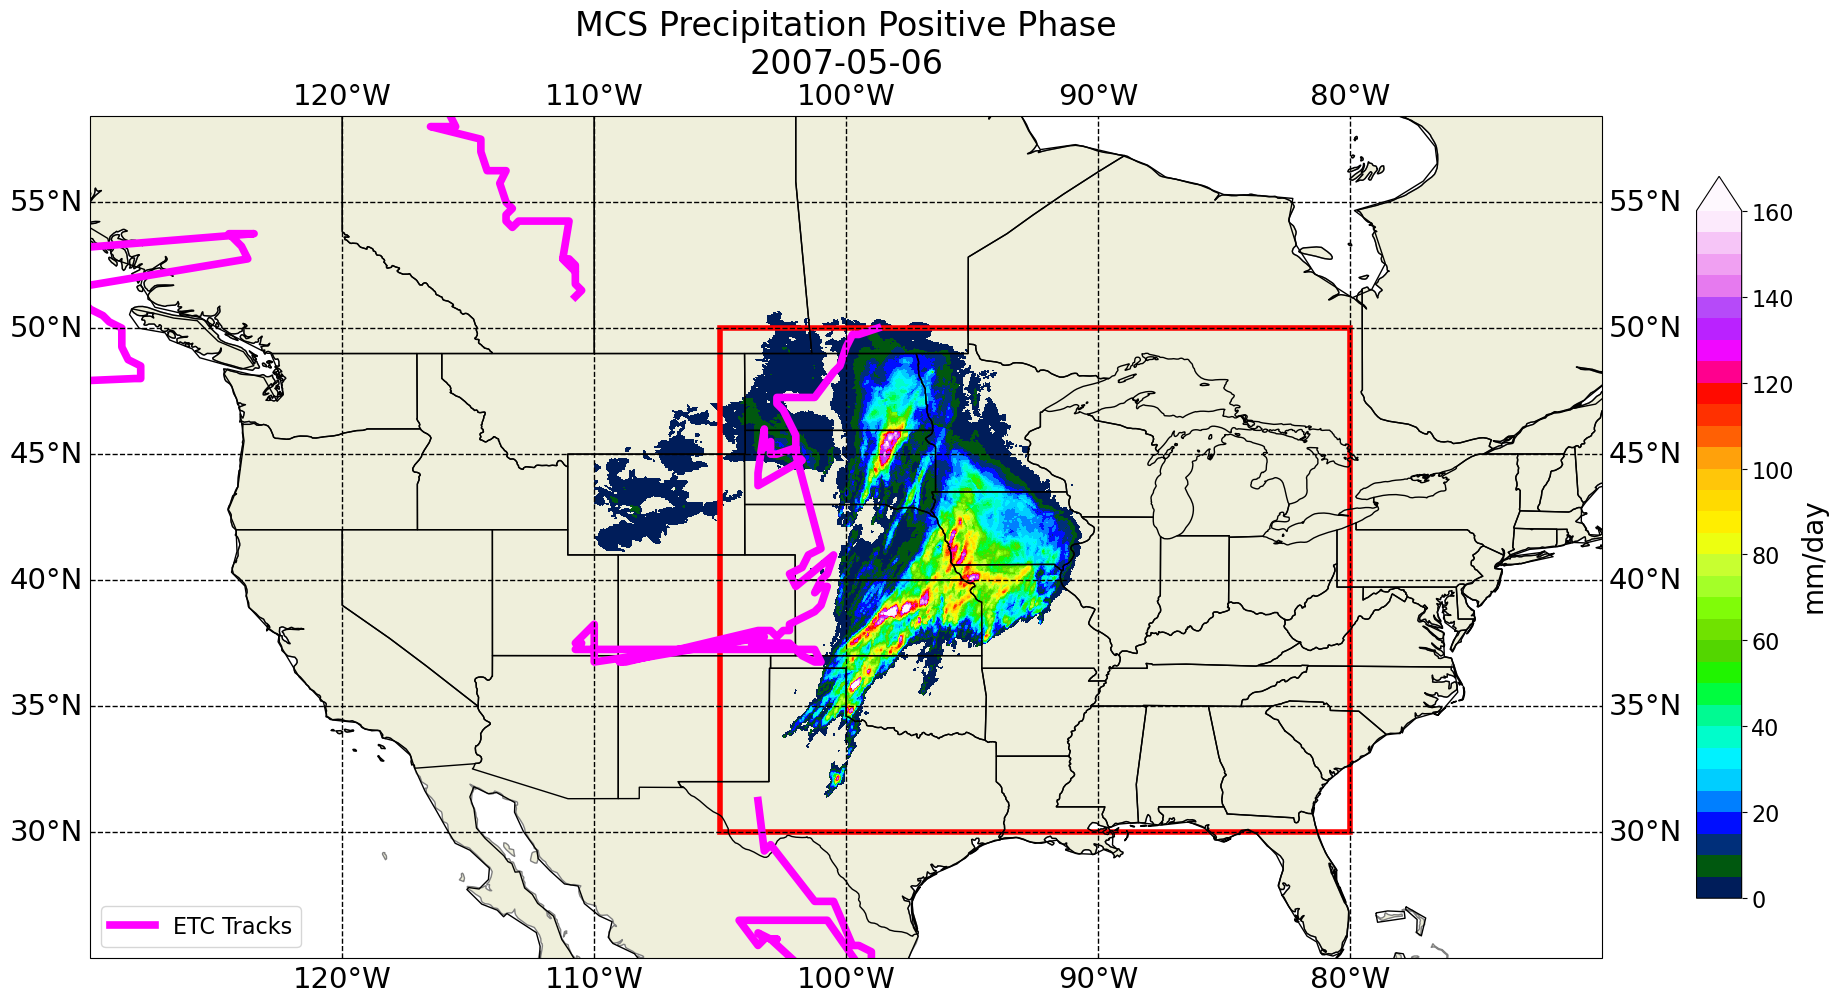

In [38]:
target_day = np.datetime64(pos_date)
# Create meshgrid
x, y = np.float32(np.meshgrid(lons, lats))

# Define the contour levels
clevs = np.arange(0, 165, 5)

# Get a copy of the colormap and customize it
base_cmap = plt.cm.gist_ncar(np.linspace(0, 1, len(clevs)-1))

# Replace the first color (corresponding to 0) with white
base_cmap[0] = [1, 1, 1, 1]  # RGBA for white

# Create new colormap and normalization
custom_cmap = ListedColormap(base_cmap)
norm = BoundaryNorm(clevs, ncolors=custom_cmap.N)

# Plotting
fig, ax1 = plt.subplots(1, 1, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Set extent and map features
ax1.set_extent([-130, lonmax_b+10, 25, 55])
ax1.coastlines(resolution="110m", linewidth=1)
ax1.add_feature(cfeature.STATES, edgecolor='black')
ax1.add_feature(cfeature.LAND, edgecolor='grey')
# ax1.plot(matching_lons.values, matching_lats.values,
#          marker='o', linestyle='None', markersize=6,
#          color='black', transform=ccrs.PlateCarree(), label="ETC Tracks")
for track_idx in range(ds.dims['track']):
    time_on_day = ds['time'].isel(track=track_idx).dt.floor('D') == target_day

    # If the track exists at any time on the target day
    if time_on_day.any():
        # Plot the *full* track (remove NaNs)
        lats_e = ds['lat'].isel(track=track_idx).dropna('time_step')
        lons_e = ds['lon'].isel(track=track_idx).dropna('time_step')

        if lats_e.size >= 2:
            ax1.plot(lons_e, lats_e, transform=ccrs.PlateCarree(), color='magenta', linewidth=5.5)
# Gridlines
# gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='black', linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

# Set font size for grid labels
gl.xlabel_style = {'size': 21, 'color': 'black'}
gl.ylabel_style = {'size': 21, 'color': 'black'}
gl.xlabels_top = False
gl.ylabels_right = False
gl.xlines = True

masked_data = np.ma.masked_equal(mcs_array[342], 0)
mesh1 = ax1.contourf(x, y, masked_data, levels=clevs, cmap=plt.cm.gist_ncar, extend='max')


rect2 = patches.Rectangle((lonmin_b, latmin_b), 
                        lonmax_b - lonmin_b, 
                        latmax_b - latmin_b, 
                        linewidth=4, 
                        edgecolor='r', 
                        facecolor='none', transform=ccrs.PlateCarree())

# Create a custom legend line for ETC tracks
etc_legend_line = mlines.Line2D([], [], color='magenta', linewidth=5.5, label='ETC Tracks')

# Add the legend to the plot
ax1.legend(handles=[etc_legend_line], loc='lower left', fontsize=16)

ax1.add_patch(rect2)

# Colorbar
cb1 = plt.colorbar(mesh1, ax=ax1, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb1.set_label('mm/day', size=20)
cb1.ax.tick_params(labelsize=16)
ax1.set_title('MCS Precipitation Positive Phase\n2007-05-06', size=24)

plt.tight_layout()
plt.show()


---